# Random walk

In [1]:
import sys
import numpy as np
import corner
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging

from goldmine.simulators.random_walk_checkpointed import CheckpointedRandomWalk
from goldmine.inference.scandal_checkpointed import CheckpointedSCANDALInference

In [2]:
logging.basicConfig(format='%(asctime)s  %(message)s', datefmt='%H:%M')
logging.getLogger().setLevel(logging.INFO)

In [3]:
def ccolor(val, vmin, vmax, cmap='viridis'):
    cmap = matplotlib.cm.get_cmap(cmap)
    return cmap((val - vmin) / (vmax - vmin)).reshape(-1,)

## Settings

In [4]:
n_sim = 100000
n_plot = 50

theta0 = 110.
#theta1 = 90.

## Simulate random walk

In [5]:
sim = CheckpointedRandomWalk()
x0, t_xz0, z_checkpoints0, t_xz_checkpoints0, z0 = sim.rvs_score([theta0], [theta0], n_sim, return_histories=True)
#x1, t_xz1, z_checkpoints1, t_xz_checkpoints1, z1 = sim.rvs_score([theta1], [theta1], n_sim, return_histories=True)

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


## Train SCANDAL

In [6]:
inf0 = CheckpointedSCANDALInference(
    n_parameters=1,
    n_observables=1,
    n_latent=1,
    n_components=1,
    n_mades=1,
    n_made_hidden_layers=1,
    n_made_units_per_layer=20,
    activation='relu',
    batch_norm=False,
    n_step_hidden_layers=1,
    n_step_units_per_layer=20,
    step_activation='relu'
)

inf0.fit(
    theta=theta0 * np.ones_like(t_xz0),
    x=x0,
    t_xz=t_xz0,
    t_xz_checkpoints=t_xz_checkpoints0,
    z_checkpoints=z_checkpoints0,
    alpha=1.,
    beta=1000.,
    validation_split=None,
)

13:46  Initialized checkpointed NDE (MAF) with the following settings:
13:46    Parameters:        1
13:46    Observables:       1
13:46    Latent vars:       1
13:46    Checkpoint score estimator:
13:46      Hidden layers:   1
13:46      Units:           20
13:46      Activation:      relu
13:46    Global flow:
13:46      Base components: 1
13:46      MADEs:           1
13:46      Hidden layers:   1
13:46      Units:           20
13:46      Activation:      relu
13:46      Batch norm:      False
13:46  Training checkpointed SCANDAL with settings:
13:46    alpha:                  1.0
13:46    beta:                   1000.0
13:46    theta given:            True
13:46    theta1 given:           False
13:46    x given:                True
13:46    y given:                False
13:46    r_xz given:             False
13:46    t_xz given:             True
13:46    z_checkpoints given:    True
13:46    r_xz_checkpoints given: False
13:46    t_xz_checkpoints given: True
13:46    Samples:      

In [7]:
t_x0 = inf0.predict_score(
    theta=theta0 * np.ones_like(t_xz0),
    x=x0
)

In [8]:
t_xzcp0 = inf0.predict_checkpoint_scores(
    theta=theta0 * np.ones_like(t_xz0),
    z_checkpoints=z_checkpoints0
)

In [9]:
"""
inf1 = CheckpointedSCANDALInference(
    n_parameters=1,
    n_observables=1,
    n_latent=1,
    n_components=1,
    n_mades=1,
    n_made_hidden_layers=1,
    n_made_units_per_layer=20,
    activation='relu',
    batch_norm=False,
    n_step_hidden_layers=1,
    n_step_units_per_layer=20,
    step_activation='relu'
)

inf1.fit(
    theta=theta1 * np.ones_like(t_xz0),
    x=x1,
    t_xz=t_xz1,
    t_xz_checkpoints=t_xz_checkpoints1,
    z_checkpoints=z_checkpoints1,
    alpha=1.,
    beta=1000.,
    validation_split=None,
)
"""

"\ninf1 = CheckpointedSCANDALInference(\n    n_parameters=1,\n    n_observables=1,\n    n_latent=1,\n    n_components=1,\n    n_mades=1,\n    n_made_hidden_layers=1,\n    n_made_units_per_layer=20,\n    activation='relu',\n    batch_norm=False,\n    n_step_hidden_layers=1,\n    n_step_units_per_layer=20,\n    step_activation='relu'\n)\n\ninf1.fit(\n    theta=theta1 * np.ones_like(t_xz0),\n    x=x1,\n    t_xz=t_xz1,\n    t_xz_checkpoints=t_xz_checkpoints1,\n    z_checkpoints=z_checkpoints1,\n    alpha=1.,\n    beta=1000.,\n    validation_split=None,\n)\n"

In [10]:
"""
t_x1 = inf1.predict_score(
    theta=theta1 * np.ones_like(t_xz0),
    x=x1
)
t_xzcp1 = inf1.predict_checkpoint_scores(
    theta=theta1 * np.ones_like(t_xz1),
    z_checkpoints=z_checkpoints1
)
"""

'\nt_x1 = inf1.predict_score(\n    theta=theta1 * np.ones_like(t_xz0),\n    x=x1\n)\nt_xzcp1 = inf1.predict_checkpoint_scores(\n    theta=theta1 * np.ones_like(t_xz1),\n    z_checkpoints=z_checkpoints1\n)\n'

## Plot scores

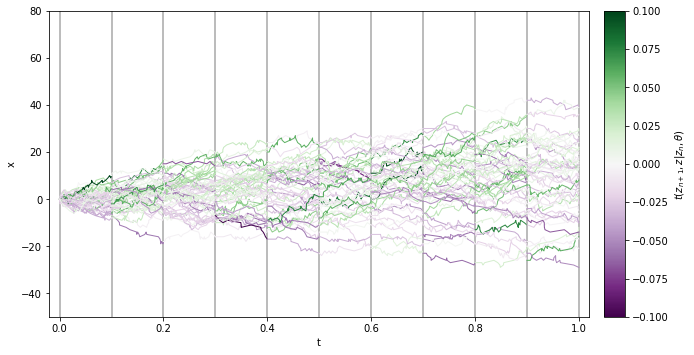

In [11]:
checkpoints = np.linspace(0.,1.,11)
xmin, xmax = -50, 80
vmax = 0.1

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_axes([0.1, 0.1, 0.75, 0.85])

# Checkpoints
for t_checkpoint in checkpoints:
    plt.plot(
        [t_checkpoint, t_checkpoint], [xmin, xmax],
        ls='-',
        c='0.65',
        lw=1.5
    )
    
# Joint scores for theta0 trajectories
for z, z_cp, t_xz in zip(z0[:n_plot], z_checkpoints0[:n_plot], t_xz_checkpoints0[:n_plot]):
    for i in range(len(checkpoints) - 1):
        t = np.array(z)[:,0]
        x = np.array(z)[:,1]
        
        tmin, tmax = checkpoints[i], checkpoints[i+1]
        t_ = t[(t >= tmin) & (t < tmax)]
        x_ = x[(t >= tmin) & (t < tmax)]
        
        t_ = np.hstack([[checkpoints[i]], t_, [checkpoints[i+1]]])
        x_ = np.hstack([z_cp[i], x_, z_cp[i+1]])
        
        plt.plot(
            t_, x_,
            c=ccolor(t_xz[i+1], -vmax, vmax, 'PRGn'),
            ls='-', lw=1., alpha=1.
        )
    
"""
# Joint scores for theta1 trajectories
for z, z_cp, t_xz in zip(z1[:n_plot], z_checkpoints1[:n_plot], t_xz_checkpoints1[:n_plot]):
    for i in range(len(checkpoints) - 1):
        t = np.array(z)[:,0]
        x = np.array(z)[:,1]
        
        tmin, tmax = checkpoints[i], checkpoints[i+1]
        t_ = t[(t >= tmin) & (t < tmax)]
        x_ = x[(t >= tmin) & (t < tmax)]
        
        t_ = np.hstack([[checkpoints[i]], t_, [checkpoints[i+1]]])
        x_ = np.hstack([z_cp[i], x_, z_cp[i+1]])
        
        plt.plot(
            t_, x_,
            c=ccolor(t_xz[i+1], -vmax, vmax, 'PRGn'),
            ls='-', lw=1., alpha=1.
        )
"""
    
plt.xlim(-0.02,1.02)
plt.ylim(xmin, xmax)

plt.xlabel('t')
plt.ylabel('x')

# Color bar
ax1 = fig.add_axes([0.87, 0.1, 0.03, 0.85])
cb = matplotlib.colorbar.ColorbarBase(
    ax1, cmap=matplotlib.cm.get_cmap("PRGn"),
    norm=matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax),
    orientation='vertical'
)
cb.set_label(r'$t(z_{n+1}, z | z_n, \theta)$')
    
plt.savefig('random_walk_joint_score.pdf')
plt.show()

## Plot estimated checkpoint scores

In [12]:
t_xzcp0.shape

(100000, 10, 1)

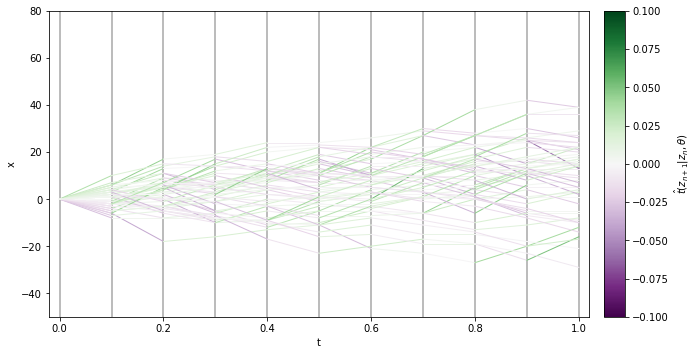

In [13]:
checkpoints = np.linspace(0.,1.,11)
xmin, xmax = -50, 80
vmax = 0.1

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_axes([0.1, 0.1, 0.75, 0.85])

# Checkpoints
for t_checkpoint in checkpoints:
    plt.plot(
        [t_checkpoint, t_checkpoint], [xmin, xmax],
        ls='-',
        c='0.65',
        lw=1.5
    )
    
# Joint scores for theta0 trajectories
for z, t_xz in zip(z_checkpoints0[:n_plot], t_xzcp0[:n_plot]):
    for i in range(len(checkpoints) - 1):
        plt.plot(
            [checkpoints[i], checkpoints[i+1]], [z[i,0], z[i+1,0]],
            c=ccolor(t_xz[i], -vmax, vmax, 'PRGn'),
            ls='-', lw=1., alpha=1.
        )
    
"""
# Joint scores for theta1 trajectories
for z, t_xz in zip(z_checkpoints1[:n_plot], t_xzcp1[:n_plot]):
    for i in range(len(checkpoints) - 1):
        plt.plot(
            [checkpoints[i], checkpoints[i+1]], [z[i,0], z[i+1,0]],
            c=ccolor(t_xz[i], -vmax, vmax, 'PRGn'),
            ls='-', lw=1., alpha=1.
        )
"""
    
plt.xlim(-0.02,1.02)
plt.ylim(xmin, xmax)

plt.xlabel('t')
plt.ylabel('x')

# Color bar
ax1 = fig.add_axes([0.87, 0.1, 0.03, 0.85])
cb = matplotlib.colorbar.ColorbarBase(
    ax1, cmap=matplotlib.cm.get_cmap("PRGn"),
    norm=matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax),
    orientation='vertical'
)
cb.set_label(r'$\hat{t}(z_{n+1}| z_n, \theta)$')
    
plt.savefig('random_walk_checkpoint_score.pdf')
plt.show()

## Plot estimated overall score

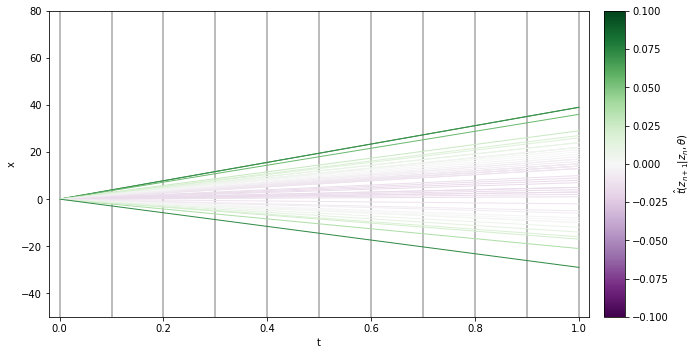

In [14]:
checkpoints = np.linspace(0.,1.,11)
xmin, xmax = -50, 80
vmax = 0.1

fig = plt.figure(figsize=(10,5))
ax0 = fig.add_axes([0.1, 0.1, 0.75, 0.85])

# Checkpoints
for t_checkpoint in checkpoints:
    plt.plot(
        [t_checkpoint, t_checkpoint], [xmin, xmax],
        ls='-',
        c='0.65',
        lw=1.5
    )
    
# Joint scores for theta0 trajectories
for x, t_x in zip(x0[:n_plot], t_x0[:n_plot]):
    plt.plot(
        [0., 1.], [0.,x[0]],
        c=ccolor(t_x, -vmax, vmax, 'PRGn'),
        ls='-', lw=1., alpha=1.
    )
    
"""
# Joint scores for theta0 trajectories
for x, t_x in zip(x1[:n_plot], t_x1[:n_plot]):
    plt.plot(
        [0., 1.], [0.,x[0]],
        c=ccolor(t_x, -vmax, vmax, 'PRGn'),
        ls='-', lw=1., alpha=1.
    )
"""
    
plt.xlim(-0.02,1.02)
plt.ylim(xmin, xmax)

plt.xlabel('t')
plt.ylabel('x')

# Color bar
ax1 = fig.add_axes([0.87, 0.1, 0.03, 0.85])
cb = matplotlib.colorbar.ColorbarBase(
    ax1, cmap=matplotlib.cm.get_cmap("PRGn"),
    norm=matplotlib.colors.Normalize(vmin=-vmax, vmax=vmax),
    orientation='vertical'
)
cb.set_label(r'$\hat{t}(z_{n+1}| z_n, \theta)$')
    
plt.savefig('random_walk_score.pdf')
plt.show()